<a href="https://colab.research.google.com/github/premkumar-99/cognifyz-Business-Analysis-/blob/main/Cognifyz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd


file = pd.read_csv("/content/Data_set 2.csv")
file

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet
5,Female,24,No,7,5,4,6,3,1,2,...,1-3 years,Daily,30%-40%,Mutual Fund,Retirement Plan,Liquidity,Fund Diversification,Safe Investment,Risk Free,Internet
6,Female,27,Yes,3,6,4,2,5,1,7,...,3-5 years,Monthly,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,High Interest Rates,Financial Consultants
7,Male,21,Yes,2,3,7,4,6,1,5,...,3-5 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Newspapers and Magazines
8,Male,35,Yes,2,4,7,5,3,1,6,...,1-3 years,Weekly,20%-30%,Equity,Retirement Plan,Capital Appreciation,Fund Diversification,Safe Investment,Fixed Returns,Television
9,Male,31,Yes,1,3,7,4,5,2,6,...,3-5 years,Monthly,30%-40%,Fixed Deposits,Retirement Plan,Capital Appreciation,Fund Diversification,Assured Returns,Fixed Returns,Newspapers and Magazines


In [19]:
# Task 1: Data Overview
# Colab: make sure your CSV is uploaded, then set DATA_PATH accordingly.
DATA_PATH = "/content/Data_set 2.csv"  # change if needed

import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

df = pd.read_csv(DATA_PATH)

# Basic checks
print("Rows, Columns:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nNull value counts:\n", df.isnull().sum())
print("\nFirst 5 rows:\n", df.head())

# Summary stats for numeric columns
print("\nNumeric summary:\n", df.describe().T)

Rows, Columns: (40, 24)

Column names:
 ['gender', 'age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold', 'Stock_Marktet', 'Factor', 'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect', 'Avenue', 'What are your savings objectives?', 'Reason_Equity', 'Reason_Mutual', 'Reason_Bonds', 'Reason_FD', 'Source']

Data types:
 gender                               object
age                                   int64
Investment_Avenues                   object
Mutual_Funds                          int64
Equity_Market                         int64
Debentures                            int64
Government_Bonds                      int64
Fixed_Deposits                        int64
PPF                                   int64
Gold                                  int64
Stock_Marktet                        object
Factor                               object
Objective                            object
Purpose                

Counts:
 gender
Male      25
Female    15
Name: count, dtype: int64


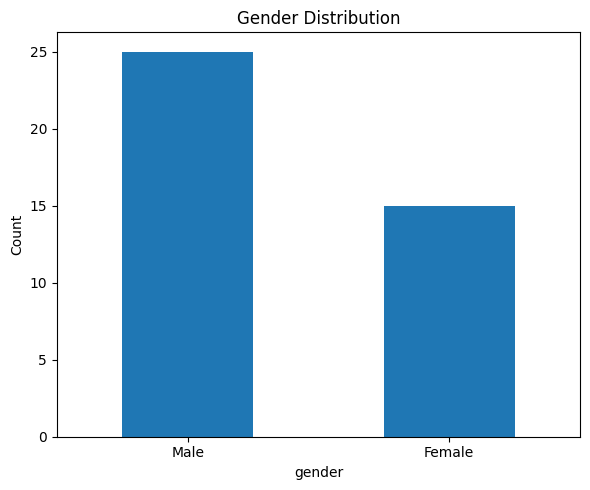

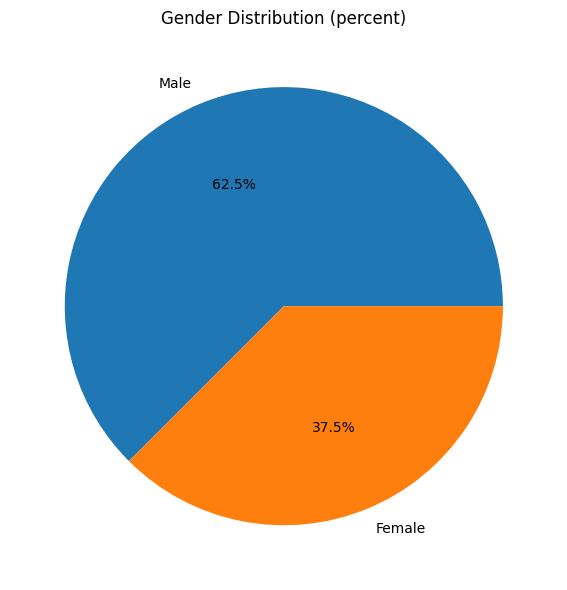

In [38]:
# Task 2: Gender Distribution
gender_col = None
for c in df.columns:
    if c.strip().lower() in ('gender','sex'):
        gender_col = c
        break

if gender_col is None:
    print("Couldn't automatically find a gender column. Please set gender_col = 'YourColumnName'")
else:
    counts = df[gender_col].fillna("Missing").value_counts()
    print("Counts:\n", counts)

    import matplotlib.pyplot as plt

    # Bar Chart
    plt.figure(figsize=(6,5))
    counts.plot(kind='bar', rot=0)
    plt.title('Gender Distribution')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig("gender_distribution_bar.png", dpi=300)
    plt.show()

    # Pie Chart
    plt.figure(figsize=(6,6))
    counts.plot(kind='pie', autopct='%1.1f%%', ylabel='')
    plt.title('Gender Distribution (percent)')
    plt.tight_layout()
    plt.savefig("gender_distribution_pie.png", dpi=300)
    plt.show()

In [21]:
# Task 3: Descriptive statistics
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
print("Numerical columns found:", num_cols)

if len(num_cols)==0:
    print("No numeric columns detected.")
else:
    stats = df[num_cols].agg(['count','mean','median','std','min','max']).T
    stats['median'] = df[num_cols].median()
    print(stats[['count','mean','median','std','min','max']])

    # Save to CSV for reporting
    stats.to_csv('numerical_stats.csv')
    print("Saved numerical_stats.csv")

Numerical columns found: ['age', 'Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']
                  count    mean  median       std   min   max
age                40.0  27.800    27.0  3.560467  21.0  35.0
Mutual_Funds       40.0   2.550     2.0  1.197219   1.0   7.0
Equity_Market      40.0   3.475     4.0  1.131994   1.0   6.0
Debentures         40.0   5.750     6.5  1.675617   1.0   7.0
Government_Bonds   40.0   4.650     5.0  1.369072   1.0   7.0
Fixed_Deposits     40.0   3.575     3.5  1.795828   1.0   7.0
PPF                40.0   2.025     1.0  1.609069   1.0   6.0
Gold               40.0   5.975     6.0  1.143263   2.0   7.0
Saved numerical_stats.csv


Candidate columns for investment avenue: ['Investment_Avenues', 'Invest_Monitor', 'Avenue']
Using column: Investment_Avenues
Frequencies:
 Investment_Avenues
Yes    37
No      3
Name: count, dtype: int64


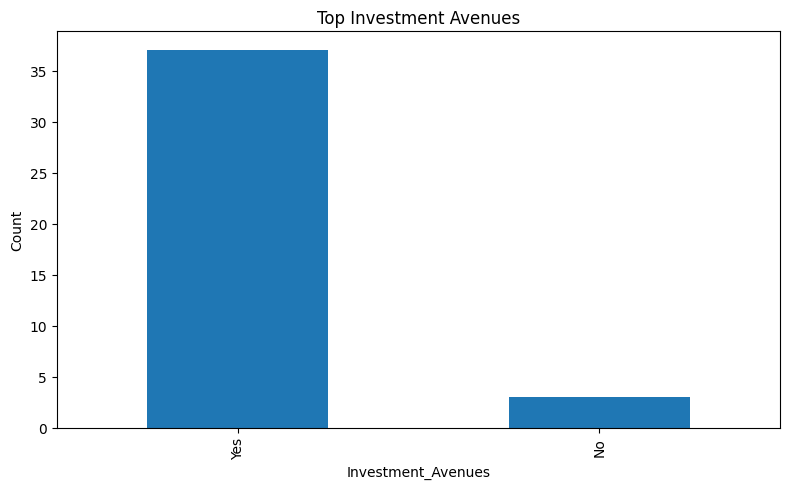

In [39]:
# Task 4: Most Preferred Investment Avenue
candidate_cols = [c for c in df.columns if 'invest' in c.lower() or 'investment' in c.lower() or 'avenue' in c.lower()]
print("Candidate columns for investment avenue:", candidate_cols)

if not candidate_cols:
    investment_col = None
    print("No obvious investment column found. Set investment_col = 'YourColumnName'")
else:
    investment_col = candidate_cols[0]
    print("Using column:", investment_col)
    freq = df[investment_col].fillna("Missing").value_counts()
    print("Frequencies:\n", freq.head(20))

    # Bar plot
    plt.figure(figsize=(8,5))
    freq.head(10).plot(kind='bar')
    plt.title('Top Investment Avenues')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig("investment_avenues.png", dpi=300)
    plt.show()

In [40]:
# Task 5: Reasons for Investment
# Candidate columns for reasons (free text)
candidate_reasons = [c for c in df.columns if 'reason' in c.lower() or 'why' in c.lower() or 'purpose' in c.lower()]
print("Candidate reason columns:", candidate_reasons)

if not candidate_reasons:
    reasons_col = None
    print("No obvious reasons column found. Set reasons_col = 'YourColumnName'")
else:
    reasons_col = candidate_reasons[0]
    print("Using reasons column:", reasons_col)

    # Basic cleaning and frequency of words/phrases
    import re
    from collections import Counter

    texts = df[reasons_col].dropna().astype(str).str.lower().tolist()
    tokens = []
    for t in texts:
        # remove punctuation, split on whitespace
        t = re.sub(r'[^a-z0-9\s]', ' ', t)
        tokens.extend([w for w in t.split() if len(w)>2])  # filter tiny words

    top_words = Counter(tokens).most_common(30)
    print("Top words in reasons:", top_words[:20])

    # Simple phrase counting: common full entries
    top_phrases = df[reasons_col].fillna('Missing').value_counts().head(20)
    print("\nTop full reason phrases:\n", top_phrases)

    # If you want categories, provide a small mapping to group synonyms:
    mapping = {
        'tax': ['tax','taxsaving','tax-saver','taxsaving'],
        'retirement': ['retire','retirement'],
        'education': ['education','school','college','study'],
        'returns': ['returns','high returns','profit','gain'],
        'safety': ['safety','secure','secure capital','secure investment'],
        'emergency': ['emergency','rainy day','unexpected']
    }
    # simple grouping
    grouped = Counter()
    for row in df[reasons_col].dropna().astype(str):
        r = row.lower()
        matched = False
        for k, kws in mapping.items():
            for kw in kws:
                if kw in r:
                    grouped[k]+=1
                    matched=True
                    break
            if matched: break
        if not matched:
            grouped['other']+=1
    print("\nGrouped reason counts:\n", grouped)

Candidate reason columns: ['Purpose', 'Reason_Equity', 'Reason_Mutual', 'Reason_Bonds', 'Reason_FD']
Using reasons column: Purpose
Top words in reasons: [('wealth', 32), ('creation', 32), ('savings', 6), ('for', 6), ('future', 6), ('returns', 2)]

Top full reason phrases:
 Purpose
Wealth Creation       32
Savings for Future     6
Returns                2
Name: count, dtype: int64

Grouped reason counts:
 Counter({'other': 38, 'returns': 2})


Candidate savings objective columns: ['Objective', 'Purpose', 'What are your savings objectives?']
Using savings column: Objective
Top savings objectives:
 Objective
Capital Appreciation    26
Growth                  11
Income                   3
Name: count, dtype: int64


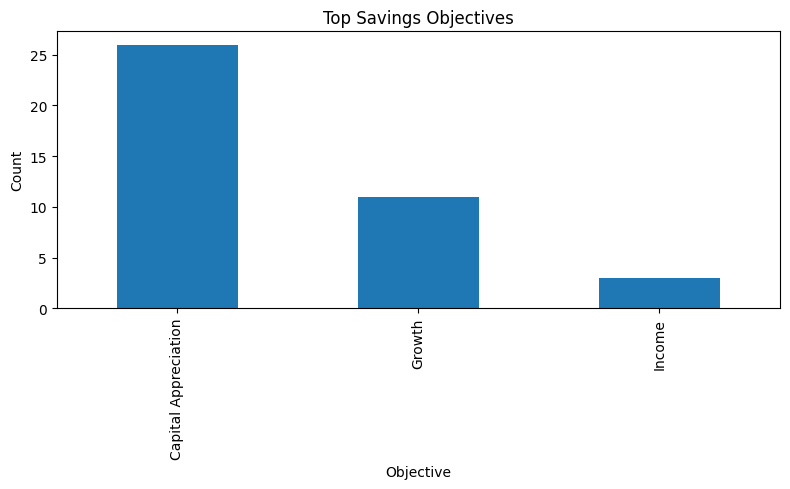

In [41]:
# Task 6: Savings Objectives
candidates = [c for c in df.columns if any(key in c.lower() for key in ['objective','goal','savings','purpose'])]
print("Candidate savings objective columns:", candidates)

if not candidates:
    savings_col = None
    print("No obvious savings column found. Set savings_col = 'YourColumnName'")
else:
    savings_col = candidates[0]
    print("Using savings column:", savings_col)
    obj_counts = df[savings_col].fillna("Missing").value_counts()
    print("Top savings objectives:\n", obj_counts.head(30))

    plt.figure(figsize=(8,5))
    obj_counts.head(10).plot(kind='bar')
    plt.title('Top Savings Objectives')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig("savings_objectives.png", dpi=300)
    plt.show()

Candidate columns: ['Source']
Using info column: Source
Top information sources:
 Source
Financial Consultants       16
Newspapers and Magazines    14
Television                   6
Internet                     4
Name: count, dtype: int64


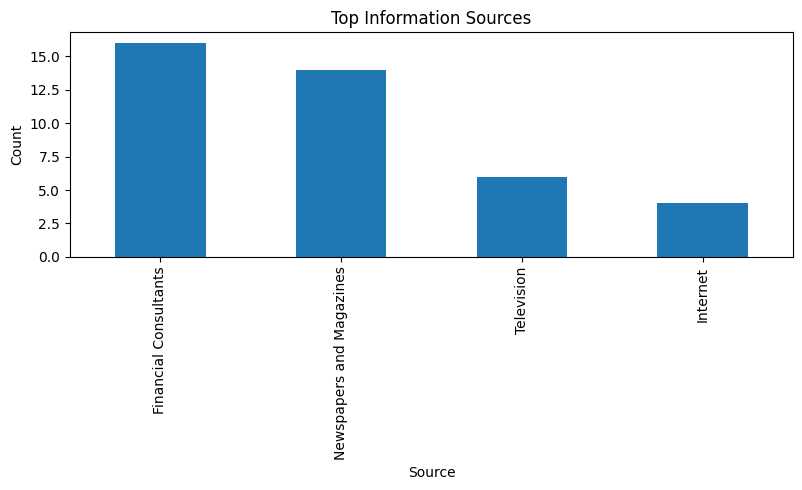

In [42]:
# Task 7: Common Information Sources
candidates = [c for c in df.columns if any(key in c.lower() for key in ['source','information','where','learn','informed'])]
print("Candidate columns:", candidates)

if not candidates:
    info_col = None
    print("No obvious info source column found. Set info_col = 'YourColumnName'")
else:
    info_col = candidates[0]
    print("Using info column:", info_col)
    sources = df[info_col].fillna("Missing").value_counts()
    print("Top information sources:\n", sources.head(20))

    plt.figure(figsize=(8,5))
    sources.head(10).plot(kind='bar')
    plt.title('Top Information Sources')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig("information_sources.png", dpi=300)
    plt.show()

Candidate duration columns: ['Duration']
Using duration column: Duration
Parsed durations (years) sample:
 0    3.0
1    5.0
2    5.0
3    1.0
4    1.0
5    3.0
6    5.0
7    5.0
8    3.0
9    5.0
Name: Duration, dtype: float64

Average duration (years): 3.9
Median duration (years): 4.0


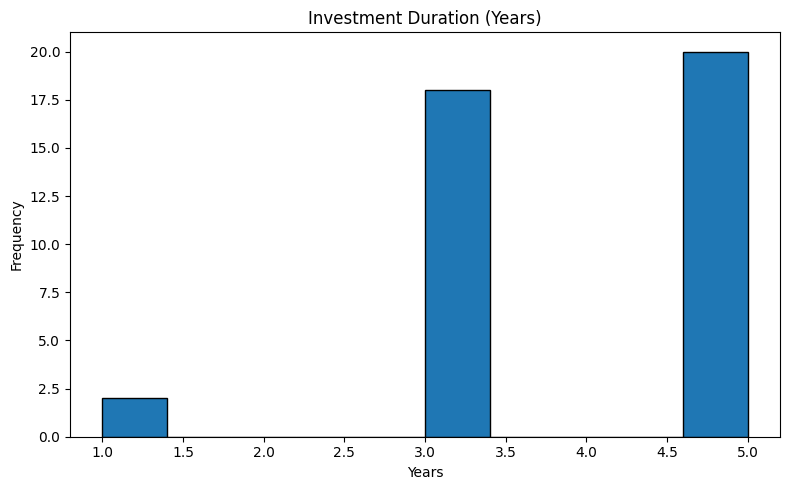

In [46]:
# Task 8: Investment Duration
# Try to auto-detect a duration column; otherwise set manually
candidates = [c for c in df.columns if 'duration' in c.lower() or 'year' in c.lower() or 'month' in c.lower() or 'tenure' in c.lower()]
print("Candidate duration columns:", candidates)

if not candidates:
    duration_col = None
    print("No obvious duration column found. Set duration_col = 'YourColumnName'")
else:
    duration_col = candidates[0]
    print("Using duration column:", duration_col)

    import re
    def parse_duration(x):
        if pd.isna(x): return None
        s = str(x).lower().strip()
        # detect years
        m = re.search(r'(\d+(\.\d+)?)\s*year', s)
        if m:
            return float(m.group(1))
        # detect months -> convert to years
        m = re.search(r'(\d+(\.\d+)?)\s*month', s)
        if m:
            return float(m.group(1))/12.0
        # plain number (assume years)
        m = re.match(r'^\s*(\d+(\.\d+)?)\s*$', s)
        if m:
            return float(m.group(1))
        # fallback: pick first number
        m = re.search(r'(\d+(\.\d+)?)', s)
        if m:
            return float(m.group(1))
        return None

    parsed = df[duration_col].apply(parse_duration)

    # Show sample
    print("Parsed durations (years) sample:\n", parsed.head(10))

    # Stats
    print("\nAverage duration (years):", parsed.dropna().mean())
    print("Median duration (years):", parsed.dropna().median())

    # Histogram
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8,5))
    parsed.dropna().plot(kind='hist', bins=10, edgecolor='black')
    plt.title('Investment Duration (Years)')
    plt.xlabel('Years')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig("investment_duration.png", dpi=300)  # <-- saves chart
    plt.show()


In [45]:
# Task 9: Expectations from Investments
# Detect column
candidates = [c for c in df.columns if any(k in c.lower() for k in ['expect','return','objective','goal','expectation'])]
print("Candidate columns:", candidates)

if not candidates:
    expect_col = None
    print("No obvious expectations column found. Set expect_col = 'YourColumnName'")
else:
    expect_col = candidates[0]
    print("Using expectations column:", expect_col)

    counts = df[expect_col].fillna("Missing").value_counts()
    print("Top expectations (raw):\n", counts.head(30))

    # Do a simple grouping similar to Task 5
    mapping = {
        'high_returns': ['high return','high returns','returns','profit','gain'],
        'safety': ['safety','safe','principal','secure'],
        'liquidity': ['liquid','liquidity','quick access','withdraw'],
        'tax_saving': ['tax','tax saving','tax-saver'],
        'capital_appreciation': ['appreciation','grow','growth']
    }
    grouped = Counter()
    for row in df[expect_col].dropna().astype(str):
        r = row.lower()
        matched = False
        for k,kws in mapping.items():
            for kw in kws:
                if kw in r:
                    grouped[k]+=1
                    matched=True
                    break
            if matched: break
        if not matched:
            grouped['other']+=1
    print("\nGrouped expectations:\n", grouped)

Candidate columns: ['Objective', 'Expect', 'What are your savings objectives?']
Using expectations column: Objective
Top expectations (raw):
 Objective
Capital Appreciation    26
Growth                  11
Income                   3
Name: count, dtype: int64

Grouped expectations:
 Counter({'capital_appreciation': 37, 'other': 3})


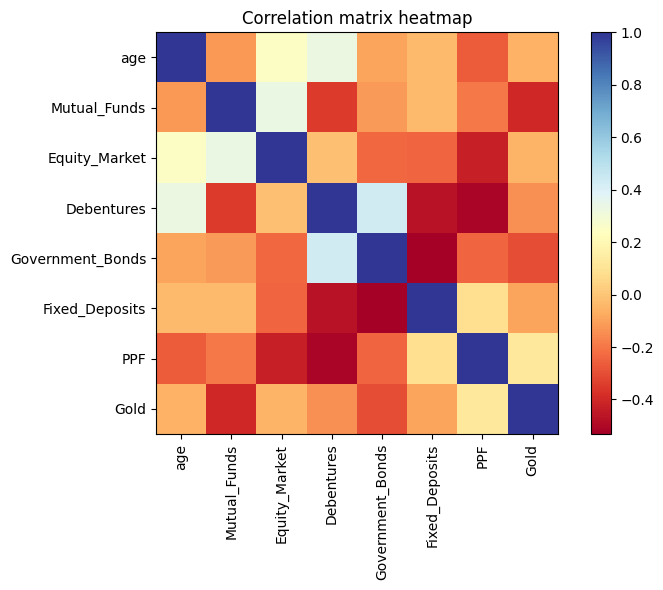

Most correlated pair (abs): ('Government_Bonds', 'Fixed_Deposits') corr= 0.5313593620792578


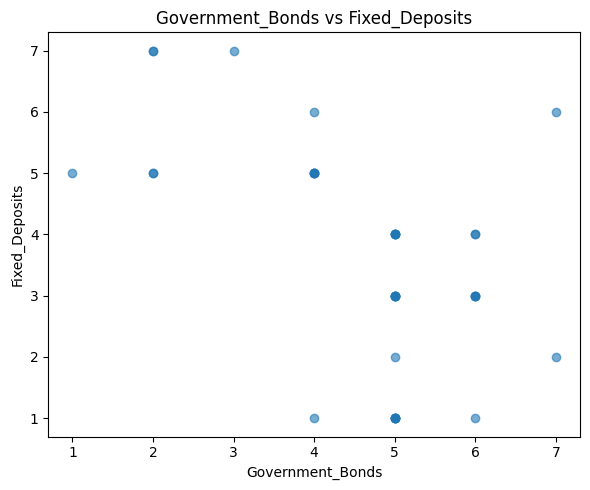

In [44]:
# Heatmap
plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation='nearest', cmap='RdYlBu')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title('Correlation matrix heatmap')
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()

# Scatter for top correlated pair
if not corr_vals.empty:
    top_pair = corr_vals.idxmax()  # tuple (col1,col2)
    print("Most correlated pair (abs):", top_pair, "corr=", corr_vals.max())
    xcol,ycol = top_pair
    plt.figure(figsize=(6,5))
    plt.scatter(df[xcol], df[ycol], alpha=0.6)
    plt.xlabel(xcol); plt.ylabel(ycol); plt.title(f'{xcol} vs {ycol}')
    plt.tight_layout()
    plt.savefig("correlation_scatter.png", dpi=300)
    plt.show()

In [55]:
from google.colab import files

# List of all charts saved in the tasks
charts = [
    "gender_distribution_bar.png",
    "gender_distribution_pie.png",
    "investment_avenues.png",
    "savings_objectives.png",
    "information_sources.png",
    "investment_duration.png",
    "correlation_heatmap.png",
    "correlation_scatter.png"
]

# Try downloading each file
for chart in charts:
    try:
        files.download(chart)
    except Exception as e:
        print(f"⚠️ Could not download {chart} (maybe it wasn't generated).")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>